# 形态学变换
## 膨胀与腐蚀

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

### 图像的膨胀

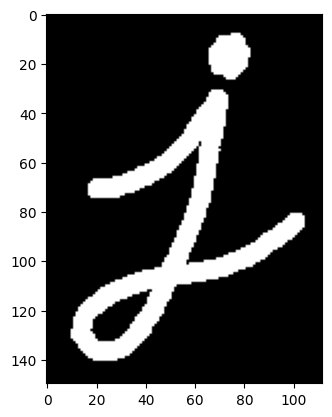

In [2]:
img = cv.imread("img/morph-j.jpg")
imshow(img)

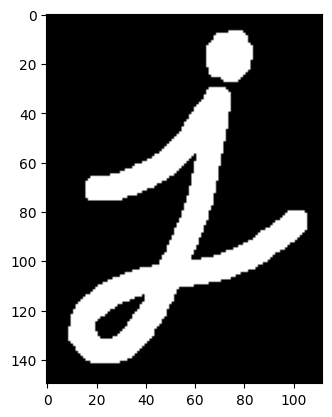

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
dialate_img = cv.dilate(img,kernel)
imshow(dialate_img)

### 腐蚀操作

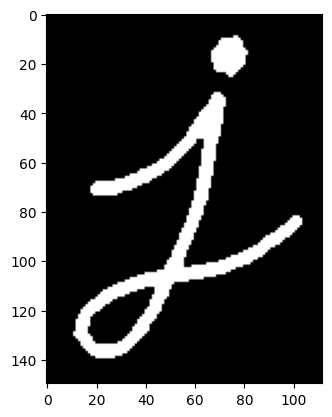

In [6]:
erode_img = cv.erode(img,kernel)
imshow(erode_img)

## 开操作和闭操作

### 开操作(先腐蚀，再膨胀)

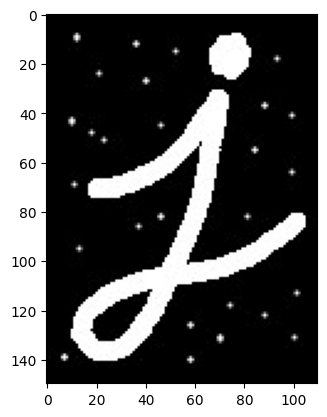

In [8]:
img = cv.imread("img/morph-opening.jpg")
imshow(img)

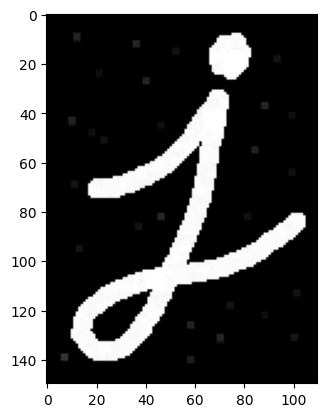

In [9]:
# 开操作
dst = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
imshow(dst)

### 闭操作（先膨胀，再腐蚀）

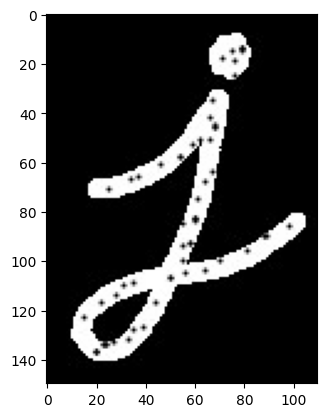

In [10]:
img = cv.imread("img/morph-closing.jpg")
imshow(img)

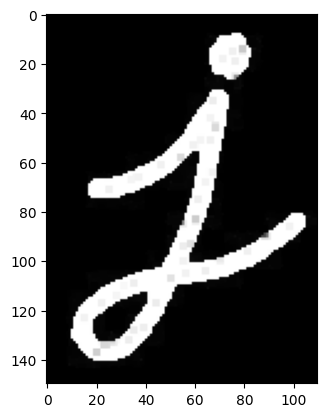

In [11]:
# 闭操作
dst = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)
imshow(dst)

## 距离变换

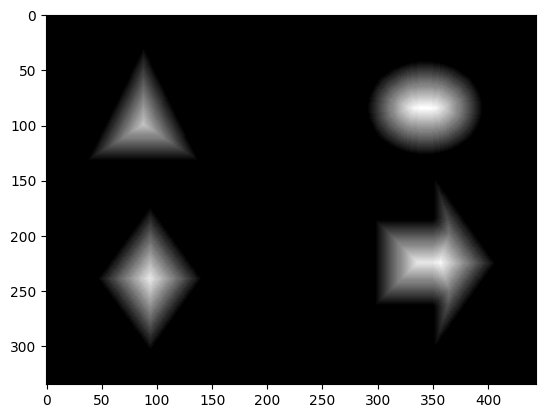

In [15]:
img = cv.imread("img/shape.jpg",cv.IMREAD_GRAYSCALE)
thresh,binary = cv.threshold(img,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# 距离计算
ret = cv.distanceTransform(binary,cv.DIST_L2,3)

ret = np.intp(ret)
plt.imshow(ret,cmap="gray")

## 零件计数

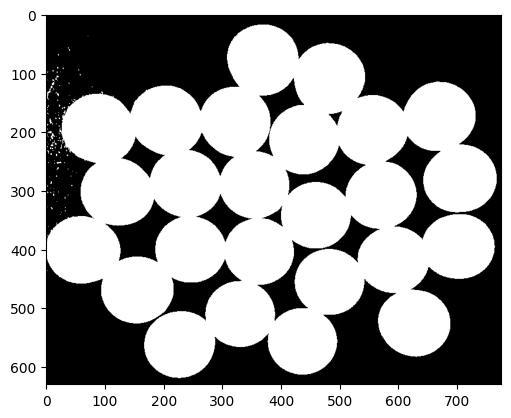

In [28]:
# img = cv.imread("img/lingjian.png",cv.IMREAD_GRAYSCALE)
img = cv.imread("img/lingjian.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY | cv.THRESH_TRIANGLE)
plt.imshow(binary,cmap="gray")

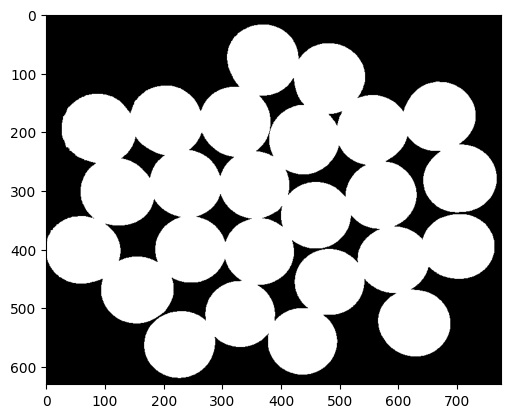

In [29]:
# 开操作
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
morph_img = cv.morphologyEx(binary,cv.MORPH_OPEN,kernel,iterations=2)
plt.imshow(morph_img,cmap="gray")

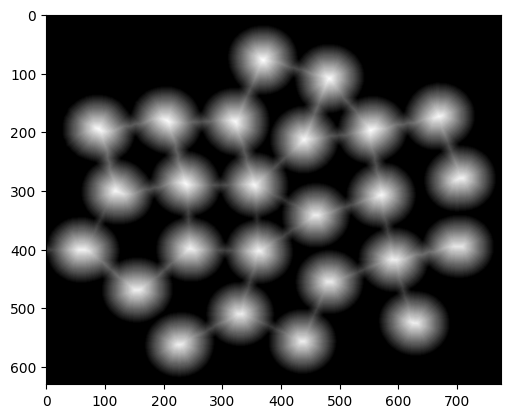

In [34]:
# 距离变换
dist_img = cv.distanceTransform(morph_img,cv.DIST_L2,3)
# 将小数转成整数
dist_img = np.intp(dist_img)
dist_img = dist_img.astype(np.uint8)
plt.imshow(dist_img,cmap="gray")

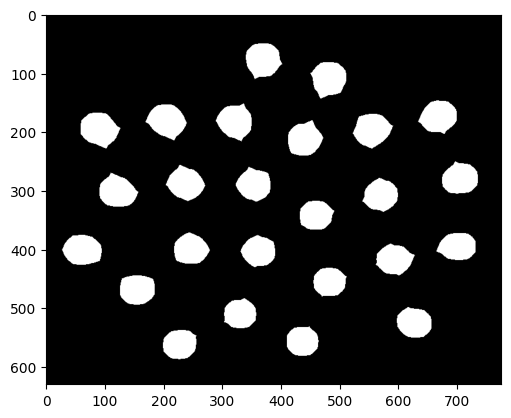

In [36]:
# 图像二值化
thresh,binary = cv.threshold(dist_img,30,255,cv.THRESH_BINARY)
plt.imshow(binary,cmap="gray")

In [37]:
# 统计零件数量
contours,_ = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(f"零件数量：{len(contours)}")

零件数量：25
